In [1]:
import pandas as pd
myData=pd.read_csv('./suicideData.csv')
myData

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [2]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


only HDI column is missing in most of the records
and we have different types of data in dataset

In [3]:
myData['country'].value_counts().head(10)

Mauritius         382
Netherlands       382
Austria           382
Iceland           382
Israel            372
United States     372
Mexico            372
Ecuador           372
Singapore         372
United Kingdom    372
Name: country, dtype: int64

there are 101 countries in the data set.
More over to this , data of different countries are not in same proportion, Which means we cannot conclude same things from every feature.

#### myData.groupby('year').suicides_no.value_counts().head(30)
#### myData.suicides_no.tail(10)
As the data setis related to suicide , it would be highly
imbalanced

<AxesSubplot:>

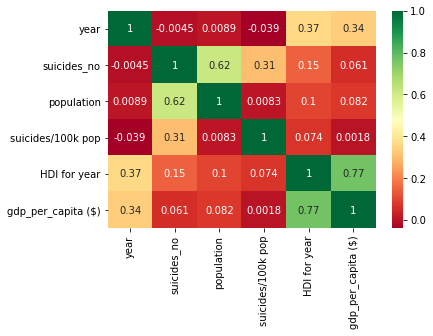

In [4]:
# myData.iloc[1,:]
import matplotlib.pyplot as plt
import seaborn as sns
corr_Matrix=myData.corr()
corr_Matrix['suicides_no']
sns.heatmap(corr_Matrix,annot=True,cmap="RdYlGn")

no. of suicides is strongly correlated to the population of
country according to data set , population/100k
and weakly correlated to hdi(but we can't take this into refrence because of high missing values)

<AxesSubplot:ylabel='year'>

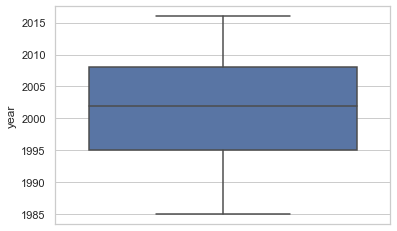

In [5]:
# checking for outliers before imputation
sns.set(style="whitegrid")
sns.boxplot(y=myData['year'])

In [6]:
# data imputed with median value
myData['HDI for year'].fillna(0.779,inplace=True)
myData['HDI for year']

0        0.779
1        0.779
2        0.779
3        0.779
4        0.779
         ...  
27815    0.675
27816    0.675
27817    0.675
27818    0.675
27819    0.675
Name: HDI for year, Length: 27820, dtype: float64

In [7]:
myData.year.value_counts()
myData.generation.unique()


array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

so ages column looks to be divide in good way.
People from all generations have committed suicides
year range is continous.

In [8]:
myData.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

<AxesSubplot:xlabel='age', ylabel='suicides_no'>

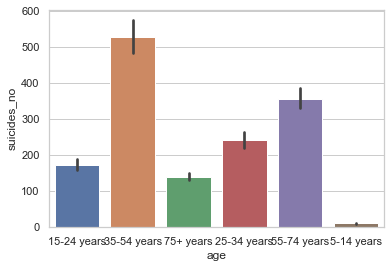

In [9]:
# myData.groupby(['country','age'])['suicides/100k pop']

sns.barplot(x=myData.age,y=myData.suicides_no)

### from 35-74 maximum people are dying 

In [10]:
myData['sex'].unique()

array(['male', 'female'], dtype=object)

only two genders are there

array([[<AxesSubplot:title={'center':'HDI for year'}>,
        <AxesSubplot:title={'center':'gdp_per_capita ($)'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'suicides/100k pop'}>],
       [<AxesSubplot:title={'center':'suicides_no'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

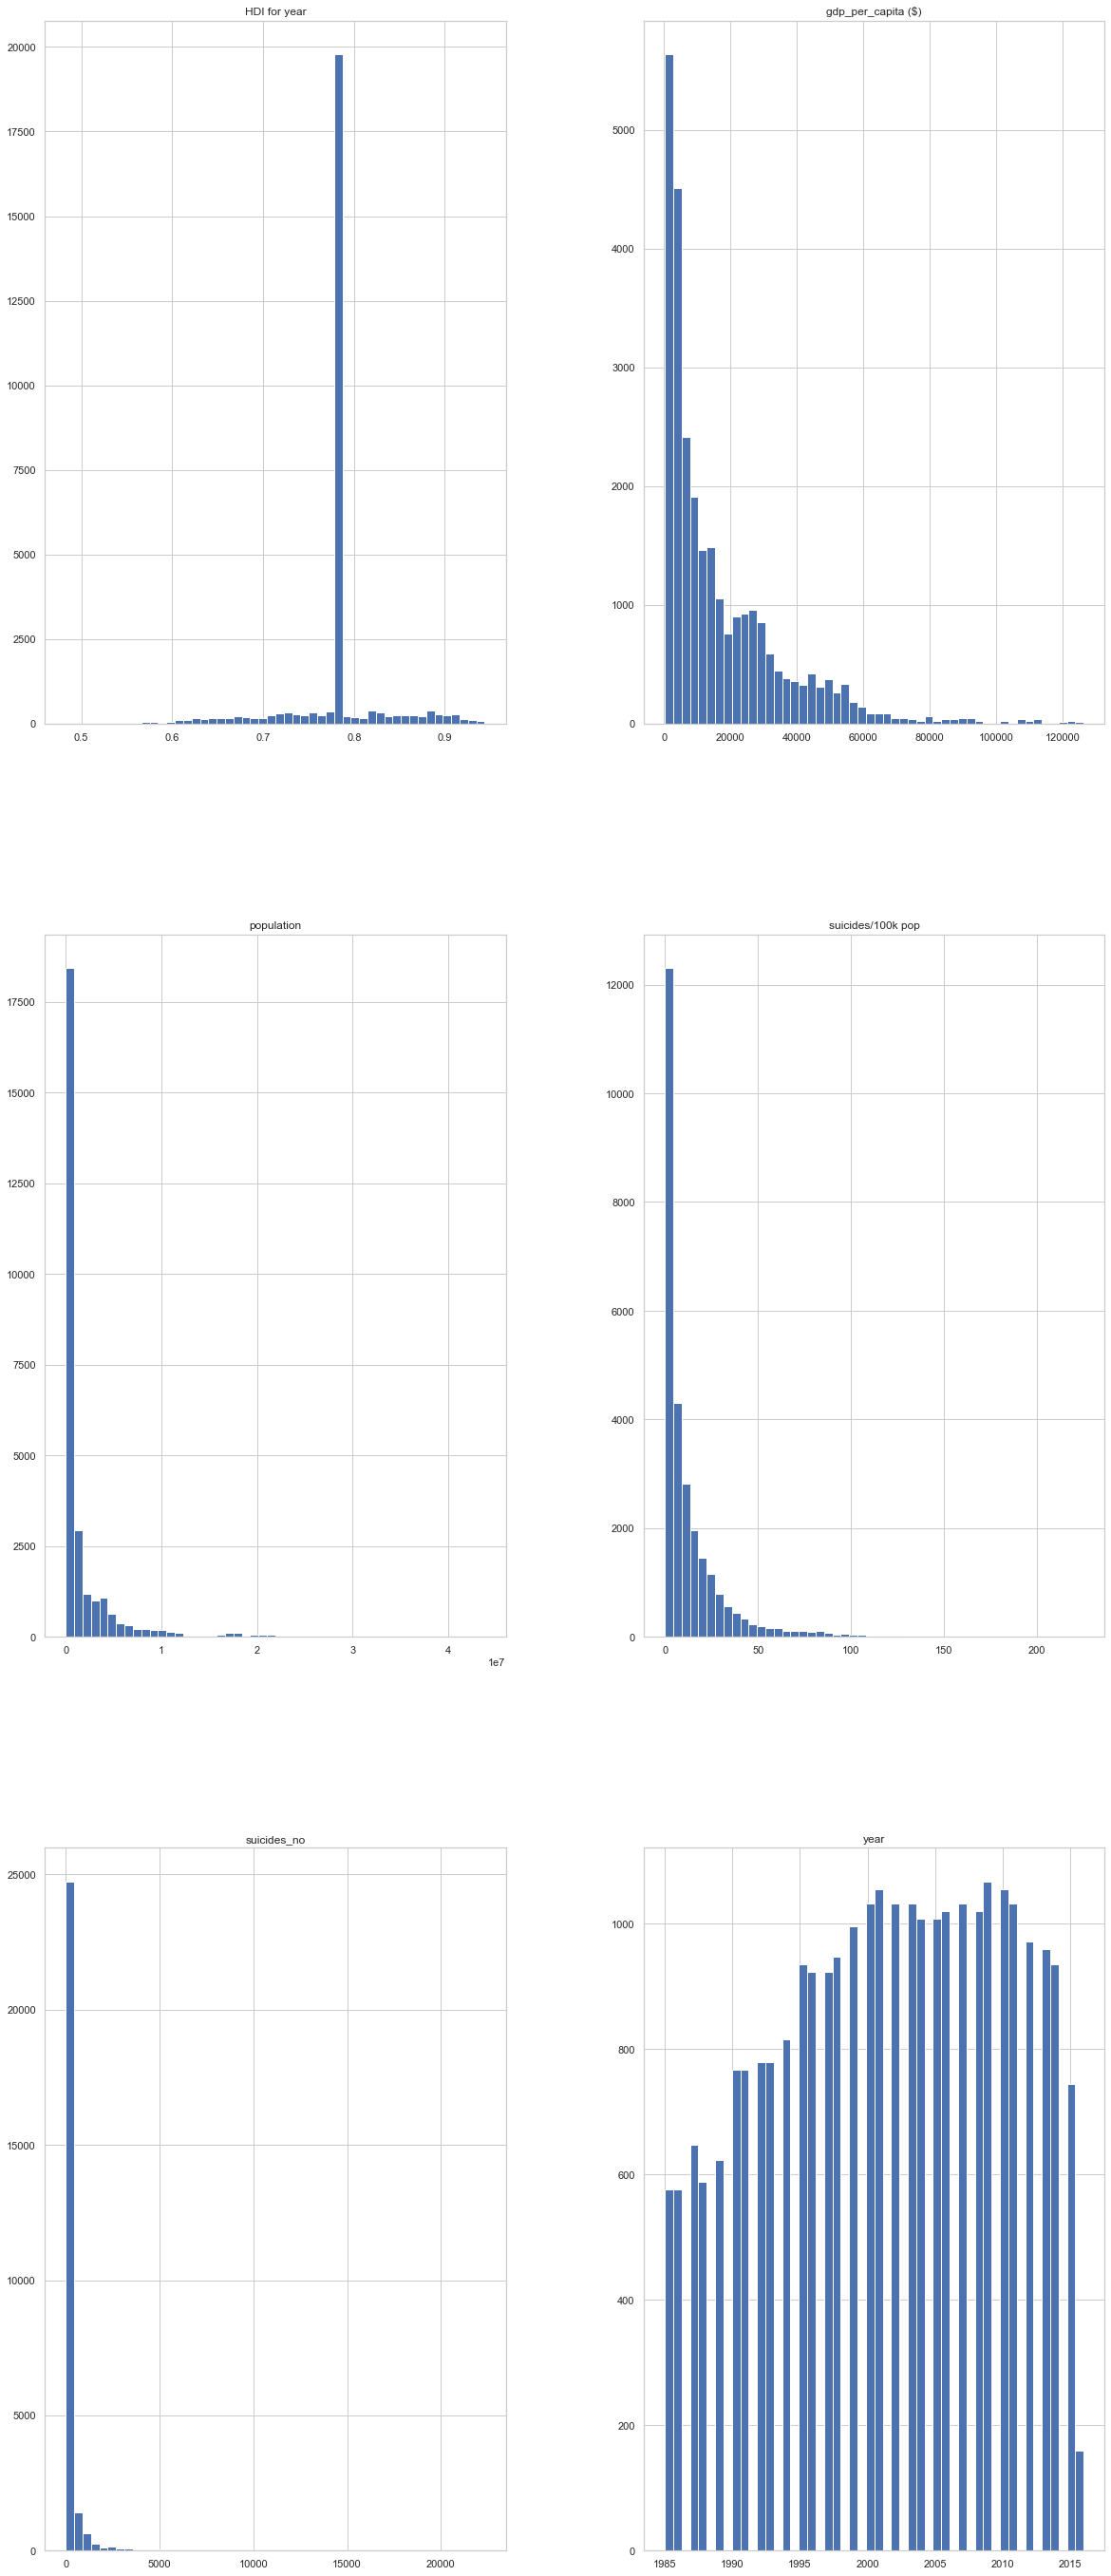

In [11]:
import matplotlib as plt
%matplotlib inline
myData.hist(bins=50,figsize=(20,49))


In [12]:
myData.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

<AxesSubplot:xlabel='year', ylabel='count'>

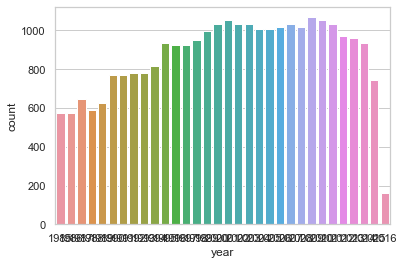

In [13]:
# myData.var(axis=0)
sns.countplot(myData['year'])
# myData['year'].count()
# sns.countplot(myData['age'])
# myData['age'].value_counts(ascending=True)

some countries data is very less as compared to others
which indicate some countries will have more affect on
analysis 

In recent Years , more data is available to us but from 2015 no. of records are decreasing 